# Задание
Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
Cохранить результаты в pandas dataframe

Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных: -- Привести колонки датафрейма к одному типу данных -- Проверить индекс, чтобы он соответствовал порядку строк -- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. 

-- Рассчитать объемы вводимого жилья по регионам и по годам. 

-- Визуализировать разброс, связь и распределение этих показателей по регионам 

-- Сделать выводы по каждому из расчетов и графиков

In [35]:
#Импортирование библиотек
import requests
import pandas as pd
import sqlite3

#Библиотеки визуализации
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
missing_values = ["nan",'N/A']
df = pd.read_csv('our_home_data.csv', na_values = missing_values)
pd.set_option('display.max_columns', None)

# Просмотр DataSet

In [ ]:
df.shape

In [21]:
df.head(50)

,Unnamed: 0,errcode,data.id,data.pdId,data.developer.devId,data.developer.devShortCleanNm,data.developer.devShortNm,data.developer.devFullCleanNm,data.developer.problObjCnt,data.developer.buildObjCnt,data.developer.comissObjCnt,data.developer.regRegionDesc,data.developer.devPhoneNum,data.developer.devSite,data.developer.devEmail,data.developer.devInn,data.developer.devOgrn,data.developer.devKpp,data.developer.devLegalAddr,data.developer.devFactAddr,data.developer.lastRpdId,data.developer.fundGuarantyFlg,data.developer.devOrgRegRegionCd,data.developer.devEmplMainFullNm,data.developer.orgForm.id,data.developer.orgForm.fullForm,data.developer.orgForm.shortForm,data.developer.objGuarantyEscrowFlg,data.developer.govFundFlg,data.region,data.address,data.objElemLivingCnt,data.objReady100PercDt,data.wallMaterialShortDesc,data.objLkFinishTypeDesc,data.objLkFreePlanDesc,data.objElemParkingCnt,data.objSquareLiving,data.rpdNum,data.rpdPdfLink,data.rpdIssueDttm,data.objLkLatitude,data.objLkLongitude,data.objCompensFundFlg,data.objProblemFlg,data.objLkClassDesc,data.loadDttm,data.objGuarantyEscrowFlg,data.objectType,data.residentialBuildings,data.newBuildingId,data.objFlatCnt,data.objFlatSq,data.objNonlivElemCnt,data.objStatus,data.isAvailableWantLiveHere,data.objInfrstrBicycleLaneFlg,data.objInfrstrRampFlg,data.objInfrstrCurbLoweringFlg,data.conclusion,data.objLkSaleDepEmail,data.objGreenHouseFlg,data.objEnergyEffShortDesc,data.infrastructureIndexValue,data.developer.developerGroupName,data.developer.companyGroupId,data.floorMin,data.floorMax,data.miniUrl,data.objFloorCnt,data.quartography.objLivElem1KCnt,data.quartography.objLivElem2KCnt,data.quartography.objLivElem3KCnt,data.quartography.objLivElem4KCnt,data.quartography.objLivElemCnt,data.quartography.objLivElemEntrCnt,data.quartography.objLivElemEntrFloorAvg,data.objTransferPlanDt,data.objLivCeilingHeight,data.objInfrstrPlaygrndCnt,data.objInfrstrSportGroundCnt,data.objInfrstrTrashAreaCnt,data.objInfrstrObjPrkngCnt,data.objInfrstrNotObjPrkngCnt,data.objElevatorWheelchairCnt,data.objElevatorPassengerCnt,data.objElevatorCargoCnt,data.soldOutPerc,data.objPriceAvg,data.generalContractorNm,data.nonlivFirstFloor,data.transportDistIndex,data.nameObj,data.greenAreaIndexValue,data.airQualityIndexValue,data.complexShortNm
0,0,0,29678,124648,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,"город Таганрог, улица Сергея Шило, д. 212-2",27,2020-03-31,Другое,Под чистовую,Нет,0,1519.00,61-000819,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:18,47.2197,38.9134,0,0,Комфорт,17-08-2022 01:24,0,normal,1,15941,27,1519.00,0,0,True,0,0,0,False,fonddolomsk@bk.ru,0,Не нормируется,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,29679,124647,7424,212-2,212-2,212-2,0,2,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,17-08-2022 01:24,0,normal,1,40800,18,1519.00,0,0,True,0,0,0,False,NaN,0,Не нормируется,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,13383,28105,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Т

In [ ]:
df.dtypes

In [ ]:
df.describe()

# Чистка

Удаление стобцов, где находится более 50% пустых ячеек

In [3]:
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageCd')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptStageDesc')
df = df.drop(columns = 'data.developer.bankruptStage.bankruptLawUrl')
df = df.drop(columns = 'data.developer.orgBankruptMsgDttm')
df = df.drop(columns = 'data.metro.id')
df = df.drop(columns = 'data.metro.name')
df = df.drop(columns = 'data.metro.line')
df = df.drop(columns = 'data.metro.color')
df = df.drop(columns = 'data.metro.time')
df = df.drop(columns = 'data.metro.isWalk')
df = df.drop(columns = 'data.metro.colors')
df = df.drop(columns = 'data.transportDistIndexValue')
df = df.drop(columns = 'data.photoRenderDTO')
df = df.drop(columns = 'data.objectTransportInfo')

Очистка строк с NaN из-за невозможности восстановления данных для подзадачи 1

In [4]:
df_avg_P = df.dropna(subset=['data.objPriceAvg','data.developer.regRegionDesc','data.objReady100PercDt'])

Также можно использовать очистку всех строк, где имеются NaN

df.dropna(axis=0,inplace=True, how='all')

# Анализ Данных

### Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [29]:
avg_price_region_nv = df.groupby('data.developer.regRegionDesc').mean()

In [31]:
avg_price_region = avg_price_region_nv['data.objPriceAvg']
avg_price_region

data.developer.regRegionDesc
Адыгея Республика                   59190.950000
Алтай Республика                    58022.000000
Алтайский край                      70012.280488
Амурская область                   111318.333333
Архангельская область               86164.833333
                                       ...      
Челябинская область                 57654.390244
Чеченская Республика                32742.333333
Чувашская Республика                63978.400000
Ямало-Ненецкий Автономный округ     90580.250000
Ярославская область                 57727.787879
Name: data.objPriceAvg, Length: 83, dtype: float64

### Рассчитать объемы вводимого жилья по регионам и по годам

In [7]:
data_prepare = df

In [9]:
c = 0
date_data = []
for i in data_prepare['data.objReady100PercDt']:
    if i not in date_data:
        date_data.append(i)

for i in date_data:
    data_prepare = data_prepare.replace(i,i[:4:])

In [10]:
count_data = data_prepare.groupby(['data.developer.regRegionDesc','data.objReady100PercDt']).count()

In [36]:
count_build_data = count_data['data.id']
count_build_data 

data.developer.regRegionDesc  data.objReady100PercDt
Адыгея Республика             2022                       8
                              2023                       7
                              2024                       9
                              2025                       6
                              2026                       1
                                                        ..
Ярославская область           2021                       3
                              2022                      26
                              2023                      42
                              2024                      17
                              2025                       5
Name: data.id, Length: 423, dtype: int64

# Визуализация

### Визуализация средней цены за квадратный метр в каждом регионе

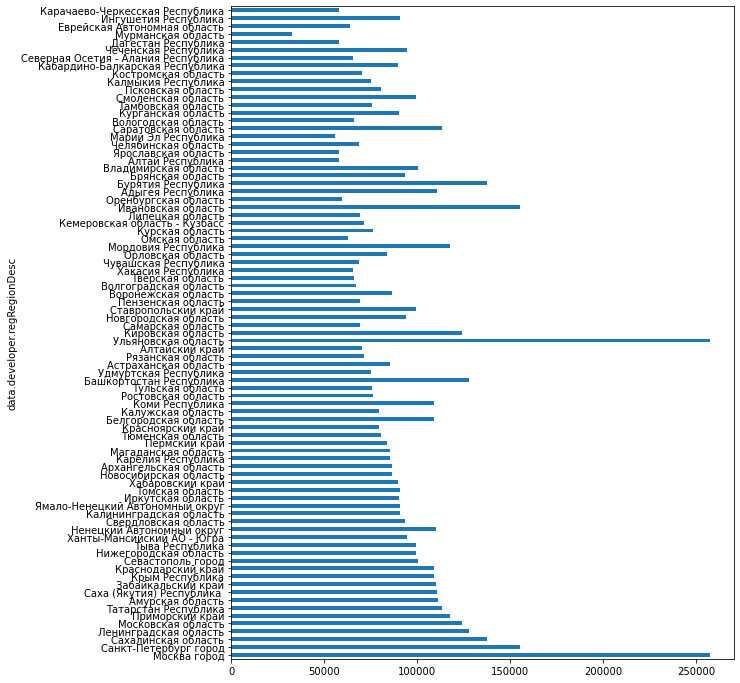

In [34]:
rcParams['figure.figsize'] = 9,12
avg_price_region.plot(kind='barh')
avg_price_region.sort_values(ascending=False).plot(kind='barh')
plt.show()

### Визуализация количества строящихся домов в каждом регионе за каждый год 

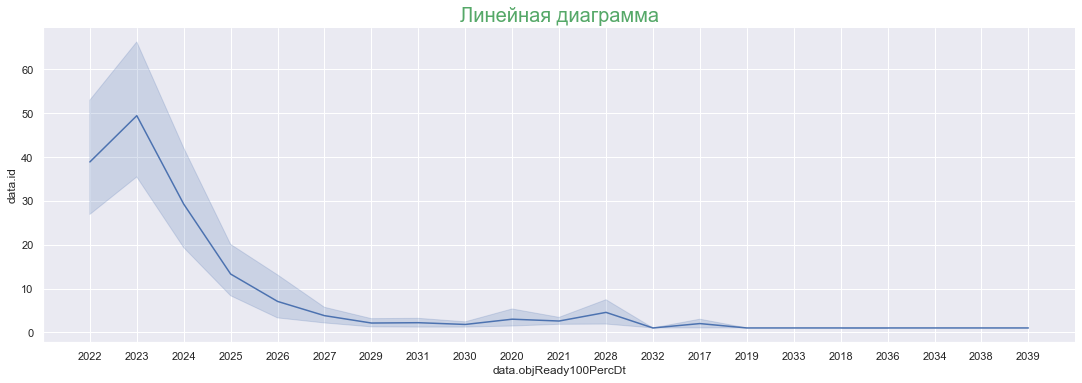

In [40]:

sns.set(style='darkgrid')  

sns.relplot(
    x='data.objReady100PercDt', 
    y='data.id',  
    data=count_data, 
    kind='line',
    aspect=3
)
plt.title('Линейная диаграмма', size=20, color='g');